# Inteligencia Artificial 2023/24
###  Belén Díaz Agudo -  Facultad de Informática UCM
### Búsqueda local con algoritmos genéticos

En esta primera parte usaremos ejercicios paso a paso para familiarizarnos con la resolución de problemas sencillos de optimización, problemas conocidos que vamos a resolver utilizando algoritmos genéticos. 
- Optimización de una función matemática 
- Encontrar los valores que resuelven una ecuación
- Problema de la mochila
- Resolver un puzle 

Este notebook no hay que entregarlo. Se evaluará en el cuestionario de evaluación.

En la segunda sesión de la práctica se os propondrá un problema adicional para entregar. 

##  Algoritmos genéticos


Se define una clase ProblemaGenetico que incluye los elementos necesarios para la representación de un problema de optimización que se va a resolver con un algoritmo genético. Los elementos son los que hemos visto en clase:

 - genes: lista de genes usados en el genotipo de los estados.
 - longitud_individuos: longitud de los cromosomas
 - decodifica: función de obtiene el fenotipo a partir del genotipo.
 - fitness: función de valoración.
 - muta: función de mutación de un cromosoma 
 - cruza: función de cruce de un par de cromosomas

In [3]:
import random

In [4]:
class ProblemaGenetico(object):
        def __init__(self, genes,fun_dec,fun_muta , fun_cruza, fun_fitness,longitud_individuos):
            self.genes = genes
            self.fun_dec = fun_dec
            self.fun_cruza = fun_cruza
            self.fun_muta = fun_muta
            self.fun_fitness = fun_fitness
            self.longitud_individuos = longitud_individuos
            """Constructor de la clase"""
                
        def decodifica(self, genotipo):
            """Devuelve el fenotipo a partir del genotipo"""
            fenotipo = self.fun_dec(genotipo)
            return fenotipo
        def muta(self, cromosoma,prob):
            """Devuelve el cromosoma mutado"""   
            mutante = self.fun_muta(cromosoma,prob)
            return mutante
        def cruza(self, cromosoma1, cromosoma2):         
            """Devuelve el cruce de un par de cromosomas"""
            cruce = self.fun_cruza(cromosoma1,cromosoma2)
            return cruce 
        def fitness(self, cromosoma):    
            """Función de valoración"""
            valoracion = self.fun_fitness(cromosoma)
            return valoracion

### Problema tipo 1 a resolver: encontrar el valor X que optimice una función

Vamos a usar como ejemplo trivial la función cuadrado x^2 en el conjunto de los números naturales menores que 2^{10}. 
Se usa este ejemplo trivial (del que sabemos la solución) para ver todos los elementos de configuración del algoritmo genético y poder observar su comportamiento. Después deberás probar con otra función más compleja de tu elección. 

In [5]:
# Será necesaria la siguiente función que interpreta una lista de 0's y 1's como un número natural:  
# La siguiente función que interpreta una lista de 0's y 1's como
# un número natural:  

def binario_a_decimal(x):
    x=x[::-1]
    return sum(b*(2**i) for (i,b) in enumerate(x)) 

In [6]:
binario_a_decimal((1,1,1,0))

14

In [7]:
# Definimos ejemplos de funciones de cruce, mutación y fitness para este problema. Puedes definir otros operadores si quieres.

def fun_cruzar(cromosoma1, cromosoma2):
    """Cruza los cromosomas por la mitad (podemos cambiar la función de cruce eligiendo otro punto de cruce al azar)"""
    l1 = len(cromosoma1)
    l2 = len(cromosoma2)
    cruce1 = cromosoma1[0:l1//2]+cromosoma2[l1//2:l2]
    cruce2 = cromosoma2[0:l2//2]+cromosoma1[l2//2:l1]
    return [cruce1,cruce2]

def fun_mutar(cromosoma,prob):
    """Elige un elemento al azar del cromosoma y lo modifica con una probabilidad igual a prob"""
    l = len(cromosoma)
    p = random.randint(0,l-1)
    if prob > random.uniform(0,1):
        cromosoma[p] =  (cromosoma[p]+1)%2
    return cromosoma

def fun_fitness_cuad(cromosoma):
    """Función de valoración que eleva al cuadrado el número recibido en binario"""
    n = binario_a_decimal(cromosoma)**2
    return n

In [8]:
# Definimos una instancia de la clase Problema Genetico correspondiente al problema de optimizar (maximizar o minimizar) la función cuadrado.
cuadrados = ProblemaGenetico([0,1],binario_a_decimal,fun_mutar, fun_cruzar, fun_fitness_cuad,10)

Una vez definida la instancia cuadrados que representa el problema genético, probar alguna de las funciones definidas en la clase anterior, para esta instancia concreta. Por ejemplo:

In [9]:
cuadrados.decodifica([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1125

1125

In [10]:
cuadrados.fitness([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1265625

1265625

In [11]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.9)
# La mutación es aleatoria. Posible salida: [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]

In [12]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

In [13]:
cuadrados.cruza([1,0,0,0,1,1,0,0,1,0,1],[0,1,1,0,1,0,0,1,1,1])
# Posible salida: [[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

[[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

La siguiente función poblacion_inicial(problema_genetico,tamaño) permite definir una población inicial de un tamaño dado, para una instancia dada de la clase anterior ProblemaGenetico

In [14]:
def poblacion_inicial(problema_genetico, size):
    l=[] # población inicial
    for i in range(size): # añadimos a la población size individuos
        x=[]
        for j in range(problema_genetico.longitud_individuos): # los individuos se generan eligiendo sus genes
                                                               # de manera eleatoria de entre los genes posibles
            x.append(random.choice(problema_genetico.genes))
        l.append(x) 
    return l

In [15]:
poblacion_inicial(cuadrados,10)

[[1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
 [1, 1, 1, 1, 0, 0, 1, 1, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 1, 0, 1],
 [1, 1, 1, 0, 0, 1, 1, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 1, 1, 1, 0, 0],
 [1, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 0, 1, 1, 1, 1, 1, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 1, 0, 1, 1, 0, 0]]

Definimos la función de cruce que recibe una instancia de Problema_Genetico y una población de padres (supondremos que hay un número par de padres), obtiene la población resultante de cruzarlos de dos en dos (en el orden en que aparecen)
cruza_padres(problema_genetico,padres)

In [16]:
def cruza_padres(problema_genetico,padres):
    l = []
    for i in range(len(padres)//2):# asumimos que la población de la que partimos tiene tamaño par
        desc = problema_genetico.fun_cruza(padres[2*i],padres[2*i+1]) # El cruce se realiza con la función de cruce  
                                                                     # proporcionada por el propio problema genético
        l.append(desc[0]) # La población resultante se obtiene de cruzar el padre[0] con padre[1], padre[2] con padre[3]...
        l.append(desc[1]) # y añadir cada par de descendientes a la nueva población
    return l

In [17]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

cruza_padres(cuadrados,p1)
# Posible salida
# [[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
#  [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#  [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
#  [0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
#  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]]

[[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]]

La función de mutación recibe una instancia de Problema_Genetico, una población y una probabilidad de mutación y obtiene la población resultante de aplicar operaciones de mutación a cada individuo llamando a la función muta definida para el problema genético.  muta_individuos(problema_genetico, poblacion, prob)

In [18]:
def muta_individuos(problema_genetico, poblacion, prob):
    # problema_genetico.muta(x,prob) para todos los individuos de la poblacion.
    l = []
    for i in poblacion:
        l.append(problema_genetico.muta(i,prob))
    return l

In [19]:
muta_individuos(cuadrados,p1,0.5)
# Posible salida:
#  [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#   [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
#   [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
#   [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
#   [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 0, 0, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 1, 0, 1, 0, 1, 1, 0, 1]]

Vamos a definir una función de selección mediante torneo de n individuos de una población.  
La función recibe como entrada:
 - una instancia de la clase ProblemaGenetico
 - una población
 - el número n de individuos que vamos a seleccionar
 - el número k de participantes en el torneo
 - un valor opt que puede ser o la función max o la función min (dependiendo de si el problema es de maximización o de minimización, resp.).

seleccion\_por\_torneo(problema_genetico,poblacion,n,k,opt) 

Usar random.sample para seleccionar k elementos de una secuencia. 
Por ejemplo, random.sample(population=[2,5,7,8,9], k=3) devuelve [7,5,8]. 

In [20]:
def seleccion_por_torneo(problema_genetico, poblacion, n, k, opt):
    """Selección por torneo de n individuos de una población. Siendo k el nº de participantes
        y opt la función max o min."""
    seleccionados = []
    for i in range(n):
        participantes = random.sample(poblacion,k)
        seleccionado = opt(participantes, key=problema_genetico.fitness)
        opt(poblacion, key=problema_genetico.fitness)
        seleccionados.append(seleccionado)
        # poblacion.remove(seleccionado)
    return seleccionados  

In [21]:
#Ejemplo
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,max)
# Posible salida: [[1, 1, 1, 1, 1, 0, 0, 0, 1, 1], [1, 0, 0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 1, 1, 0, 1, 1, 1, 0, 1]]


[[1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 0, 1, 1, 1, 1, 1, 1, 1, 0]]

In [22]:
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,min)
# [[0, 0, 1, 1, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0, 1, 0, 1, 0]]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

In [23]:
# La siguiente función implementa una posibilidad para el algoritmo genético completo con los elementos anteriores: 
# inicializa t = 0 
# Generar y evaluar la Población P(t)
# Mientras no hemos llegado al número de generaciones fijado:  t < nGen
#    P1 = Selección por torneo de (1-size)·p individuos de P(t)
#    P2 = Selección por torneo de (size·p) individuos de P(t)
#    Aplicar cruce en la población P2
#    P4 = Union de P1 y P3
#    P(t+1) := Aplicar mutación P4 
#    Evalua la población P(t+1) 
#    t:= t+1
        
# Sus argumentos son:
# problema_genetico: una instancia de la clase ProblemaGenetico con la representación adecuada del problema de optimización 
# que se quiere resolver.
# k: número de participantes en los torneos de selección.
# opt: max ó min, dependiendo si el problema es de maximización o de minimización. 
# nGen: número de generaciones (que se usa como condición de terminación)
# size: número de individuos en cada generación
# prop_cruce: proporción del total de la población que serán padres. 
# prob_mutación: probabilidad de realizar una mutación de un gen.

def algoritmo_genetico(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar):
    poblacion= poblacion_inicial(problema_genetico,size)
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)

    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 


Observa que dada una población la función auxiliar nueva_generacion(problema_genetico,poblacion,n_padres,n_directos,prob_mutar) se encarga de calcular la siguiente generación.        

In [24]:
#Definir la función nueva_generacion
def nueva_generacion(problema_genetico, k,opt, poblacion, n_padres, n_directos, prob_mutar):
    padres2 = seleccion_por_torneo(problema_genetico, poblacion, n_directos, k,opt) 
    padres1 = seleccion_por_torneo(problema_genetico, poblacion, n_padres , k, opt)
    cruces =  cruza_padres(problema_genetico,padres1)
    generacion = padres2+cruces
    resultado_mutaciones = muta_individuos(problema_genetico, generacion, prob_mutar)
    return resultado_mutaciones

#### Ejecutar el algoritmo genético anterior, para resolver el problema anterior (tanto en minimización como en maximización) para una función compleja de tu elección. 

Se recomienda comenzar probando los resultados y comportamiento del algoritmo para la función X^2 (ya que sabemos la solución).
Después se pide hacer una valoración de resultados y comentarios sobre el comportamiento del algoritmmo para otra función que elijas. Puedes elegir cualquier otra función compleja. Ejemplo:

f(x) = |(x-12)/(2+sen(x)|  
entre X=-5 y X=25

Sólo tendras que modificar la representación (para permitir números negativos) y la función de fitness.


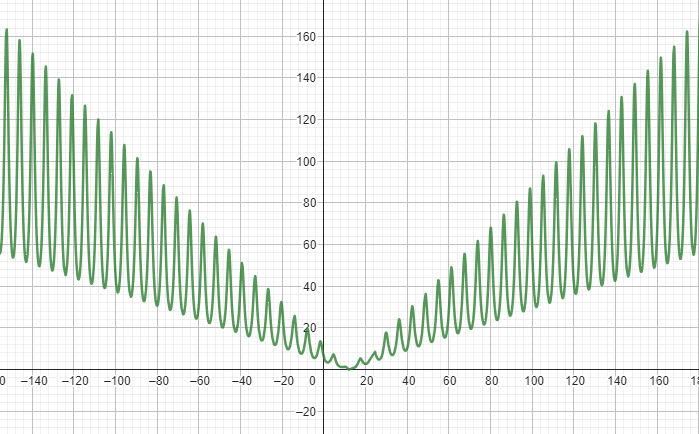

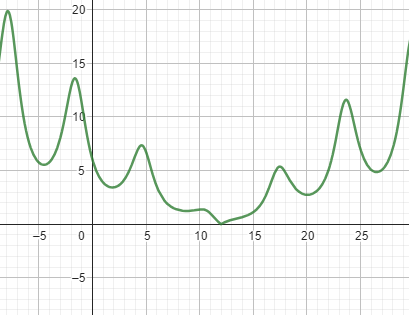

En la resolución del problema hay que tener en cuenta que el algoritmo genético devuelve un par con el mejor fenotipo encontrado y su valoración.

Se puede calcular el número de veces que el algoritmo alcanza la solución óptima modificando parámetros como:

    -k=número de participantes del torneo
    -ngen=número de generaciones
    -size=tamaño de la población
    -prob_cruce=probabilidad de cruce
    -prob_mutacion=probabilidad de mutacion

Una vez configurado el algoritmo no se ejecuta una única vez. Para evaluar convenientemente una representación hay que realizar pruebas para un número suficiente de ejecuciones para las cuales queremos estudiar cual es el porcentaje de optimalidad del algoritmo para los distintos parámetros y de ahí sacar conclusiones. 
Una vez que se conoce la solución se pueden considerar exitosas soluciones aproximadas, por ejemplo, que para el problema de minimización es exitosa si la solución es menor que 23 y para el problema de maximización una solución será exitosa si es mayor que 1000.

In [25]:
# observa que 20 generaciones son muy pocas (y los resultados son malos) prueba más generaciones para obtener mejores resultados.
algoritmo_genetico(cuadrados,3,min,200,10,0.7,0.1)
# Solución óptima: (0, 0)

(0, 0)

In [26]:
algoritmo_genetico(cuadrados,3,max,20,10,0.7,0.1)
# Solución óptima: (1023, 1046529)

(1023, 1046529)


### Problema tipo 2 a resolver: encontrar los valores (X,Y,Z,T) que resuelvan una ecuación

Por ejemplo, queremos resolver una ecuación del tipo  34*X + 100*Y + 2*Z + 66*T = 220 con un algoritmo genético.

En este caso, se puede optar por una representación binaria, o podemos definir los cromosomas con un vector de 4 números enteros que representan las soluciones 
(X, Y, Z, T)  

### Problema tipo 3 a resolver: problema de la mochila 

Se plantea el típico problema de la mochila en el que dados n objetos de pesos conocidos pi y valor vi (i=1,...,n) hay que elegir cuáles se meten en una mochila que soporta un peso P máximo. La selección debe hacerse de forma que se máximice el valor de los objetos introducidos sin superar el peso máximo.

Se propone una representación del problema de la mochila usando genes [0,1] y longitud de los individuos n.
Los valores 1 ó 0 representan, respectivamente, si el objeto se introduce o no en la mochila.

Tomados de izquerda a derecha, a partir del primero que no cabe, se consideran todos fuera de la mochila,independientemente del gen en su posición. De esta manera, todos los individuos representan candidatos válidos.

El numero de objetos n determina la longitud de los individuos de la población. En primer lugar es necesario definir una función de decodificación de la mochila que recibe como entrada:
- un cromosoma (en este caso, una lista de 0s y 1s, de longitud igual a n_objetos)
- n: número total de objetos de la mochila
- pesos: una lista con los pesos de los objetos
- capacidad: peso máximo de la mochila. 

La función decodifica recibe (cromosoma, n, pesos, capacidad) y devuelve una lista de 0s y 1s que indique qué objetos están en la mochila y cuáles no (el objeto i está en la mochila si y sólo si en la posición i-ésima de la lista hay un 1). Esta lista se obtendrá a partir del cromosoma, pero teniendo en cuenta que a partir del primer objeto que no quepa, éste y los siguientes se consideran fuera de la mochila, independientemente del valor que haya en su correspondiente posición de cromosoma.

In [27]:
def decodifica(cromosoma, n, pesos, capacidad):
    peso_en_mochila = 0
    l = []
    for i in range(n):
        if cromosoma[i] == 1 and peso_en_mochila + pesos[i] <= capacidad:
            l.append(1)
            peso_en_mochila += pesos[i]
        elif cromosoma[i]== 0 or peso_en_mochila + pesos[i] > capacidad:
            l.append(0)
    return l 

In [28]:
decodifica([1,1,1,1,1], 5, [2,3,4,5,1], 5)

[1, 1, 0, 0, 0]

Para definir la función de evaluación (fitness) necesitamos calcular el valor total de los objetos que están dentro de la mochila que representa el cromosoma según la codificación utilizada en la función anterior.

Se pide la función fitness (cromosoma, n_objetos, pesos, capacidad, valores) donde los parámetros son los mismos que en la función anterior, y valores es la lista de los valores de cada objeto

fitness(cromosoma, n_objetos, pesos, capacidad, valores)

Ejemplo de uso: fitness([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5]) 7

In [29]:
def fitness_mochila(cromosoma, n_objetos, pesos, capacidad, valores):
    # escribe el código aquí
    l = decodifica(cromosoma, n_objetos, pesos, capacidad)
    valor = 0
    for i in range(len(l)):
        if l[i] == 1:
            valor += valores[i]

    return valor

In [30]:
fitness_mochila([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5])

7

Damos tres instancias concretas del problema de la mochila. Damos también sus soluciones optimas, para que se puedan comparar con los resultados obtenidos por el algoritmo genético:

In [31]:
# Problema de la mochila 1:
# 10 objetos, peso máximo 165
pesos1 = [23,31,29,44,53,38,63,85,89,82]
valores1 = [92,57,49,68,60,43,67,84,87,72]

fitness_mochila([1,1,1,1,1,1,1,1,1,1], 10, pesos1, 165, valores1)


# Solución óptima= [1,1,1,1,0,1,0,0,0,0], con valor 309

309

In [32]:
# Problema de la mochila 2:
# 15 objetos, peso máximo 750

pesos2 = [70,73,77,80,82,87,90,94,98,106,110,113,115,118,120]
valores2 = [135,139,149,150,156,163,173,184,192,201,210,214,221,229,240]

# Solución óptima= [1,0,1,0,1,0,1,1,1,0,0,0,0,1,1] con valor 1458

In [33]:
# Problema de la mochila 3:
# 24 objetos, peso máximo 6404180
pesos3 = [382745,799601,909247,729069,467902, 44328,
       34610,698150,823460,903959,853665,551830,610856,
       670702,488960,951111,323046,446298,931161, 31385,496951,264724,224916,169684]
valores3 = [825594,1677009,1676628,1523970, 943972,  97426,
       69666,1296457,1679693,1902996,
       1844992,1049289,1252836,1319836, 953277,2067538, 675367,
       853655,1826027, 65731, 901489, 577243, 466257, 369261]

# Solución óptima= [1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1] con valoración 13549094

Definir variables m1g, m2g y m3g, referenciando a instancias de Problema_Genetico que correspondan, respectivamente, a los problemas de la mochila anteriores. Resuelve los problemas y comentar los resultados obtenidos en cuanto a eficiencia y calidad de los resultados obtenidos.

### Problema tipo 4 a resolver: puzle

Resolver mediante una configuración de un algoritmo genético el problema de los Ocho Consecutivos que distribuye los números 1 
al 8 en las ocho casillas de la figura, con la condición de que no puede haber dos números consecutivos en casillas adyacentes. Se consideran casillas adyacentes aquéllas que comparten un lado.

La siguiente configuración representa una solución al problema:
    
    2 6 8 5 
    7 4 1 3
    
**Completa la implementación** y prueba el resultado y el rendimiento del algoritmo.   
Observa que este es un problema de permutaciones y requiere mecanismos de cruce y mutación adecuados.

In [34]:
class ProblemaGeneticoOchoConsecutivos(object):
        def __init__(self,fun_dec,fun_muta , fun_cruza, fun_fitness):
            self.fun_dec = fun_dec
            self.fun_cruza = fun_cruza
            self.fun_muta = fun_muta
            self.fun_fitness = fun_fitness
                
        def decodifica(self, genotipo):
            """Devuelve el fenotipo a partir del genotipo"""
            fenotipo = self.fun_dec(genotipo)
            return fenotipo
        
        def muta(self, cromosoma,prob):
            """Devuelve el cromosoma mutado"""   
            mutante = self.fun_muta(cromosoma,prob)
            return mutante
        
        def cruza(self, cromosoma1, cromosoma2):         
            """Devuelve el cruce de un par de cromosomas"""
            cruce = self.fun_cruza(cromosoma1,cromosoma2)
            return cruce 
        
        def fitness(self, cromosoma):    
            """Función de valoración"""
            valoracion = self.fun_fitness(cromosoma)
            return valoracion

In [35]:
#Funcion que trasnforma la lista de numeros, en una matriz 2x4
def lista_a_matriz(cromosoma):
    salida=[]
    
    linea=[]
    for i in range(len(cromosoma)//2):
        linea.append(cromosoma[i])
    salida.append(linea)
    
    linea=[]
    for i in range(len(cromosoma)//2,len(cromosoma)):
        linea.append(cromosoma[i])
    salida.append(linea)
    return salida

In [36]:
# Vamos a utilizar una version de PMX para cruzar
def fun_cruzarPMX(cromosoma1, cromosoma2):
    l = len(cromosoma1)
    p1 = random.randint(0,l-1)
    p2 = random.randint(p1,l-1)
    cruzar1 = PMX(cromosoma1,cromosoma2,p1,p2)
    cruzar2 = PMX(cromosoma2,cromosoma1,p1,p2)
    return [cruzar1,cruzar2]

def PMX(cP,cH,p1,p2):
    #Inicializamos la lista para poder acceder a las coordenadas directamente
    salida =[]
    for _ in range(len(cP)):
        salida.append(0)
    
    #Insertamos la parte del CromosomaP
    for i in range(p1,p2+1):
        salida[i]=cP[i]
        
    #Rellenamos el array con el otro Cromosoma
    for i in range(p1,p2+1):
        num = cH[i]
        if not num in salida:
            numP = cP[i]
            index = cH.index(numP)
            while salida[index]!=0:
                numP = cP[index]
                index = cH.index(numP)
            salida[index]=num
            
    #Terminamos de rellenarlo
    for i in range(len(salida)):
        if salida[i]==0:
            salida[i]=cH[i]
            
    return salida

#Vamor a utilizar una funcion de cruze por orden
def fun_cruzarOrden(cromosoma1, cromosoma2):
    l = len(cromosoma1)
    p1 = random.randint(0,l-1)
    p2 = random.randint(p1,l-1)
    cruzar1 = orden(cromosoma1,cromosoma2,p1,p2)
    cruzar2 = orden(cromosoma2,cromosoma1,p1,p2)
    return [cruzar1,cruzar2]

def orden(cP,cH,p1,p2):
    #Inicializamos la lista para poder acceder a las coordenadas directamente
    salida =[]
    for _ in range(len(cP)):
        salida.append(0)
    
    #Insertamos la parte del CromosomaP
    for i in range(p1,p2+1):
        salida[i]=cP[i]
        
    #Insertamos los elementos que faltan el orden que se encuentran en cH empezando por P2
    index=p2+1
    indexcH=p2+1
    while salida[index%len(salida)]==0:
        while cH[indexcH%len(cH)] in salida:
            indexcH+=1
        salida[index%len(salida)]=cH[indexcH%len(cH)]
        index+=1
        
    return salida

#funcion que intercambia un par de elementos del cromosoma
def fun_mutar_par(cromosoma,prob):
    #Elegimos dos puntos del array para intercambiarlos
    l = len(cromosoma)
    p1 = random.randint(0,l-1)
    p2 = random.randint(0,l-1)
    
    #Queremos tener dos puntos distintos
    while p1==p2:
        p2 = random.randint(0,l-1)
    
    #Si la probabilidad sale favorable los intercambiamos
    if prob > random.uniform(0,1):
        aux = cromosoma[p1]
        cromosoma[p1]=cromosoma[p2]
        cromosoma[p2]=aux
    return cromosoma

#funcion que mezcla los elementos entre dos puntos aleatorios
def fun_mutar_scramble(cromosoma,prob):
    #obtenemos dos puntos tal que 0 <= i <= j <= len(cromosoma)
    i=random.randrange(0,len(cromosoma)-1)
    j=random.randrange(i,len(cromosoma))
    
    #si la probabilidad sale favorable mezclamos el fragmento entre i y j
    if prob > random.uniform(0,1):
        segmento=cromosoma[i:j]
        random.shuffle(segmento)
        cromosoma =  cromosoma[:i] + segmento + cromosoma[j:]
        
    return cromosoma

#Funcion que obtendra +1 si un numero tiene otro a su alrededor que no sea consecutivo y -1 si es consecutivo
def fun_fitness_Ocho_Cons(cromosoma):
    # tu código aquí
    return n

In [37]:
def poblacion_inicial(size):
    l=[] # población inicial
    # pon tu código aquí
    return l

#Funcion que craza los padres de forma destructiva
def cruza_padres_destructiva(problema_genetico,padres):
    l = []
    for i in range(len(padres)//2):
        desc = problema_genetico.fun_cruza(padres[2*i],padres[2*i+1])                                                      
        l.append(desc[0]) 
        l.append(desc[1])
    return l

#Funcion que craza los padres de forma NO destructiva, es decir se queda con los dos mejores entre los hijos y los padres
def cruza_padres_NO_destructiva(problema_genetico,padres):
    l = []
    ## pon tu código aquí
    return l

def muta_individuos(problema_genetico, poblacion, prob):
    l = []
    for i in poblacion:
        l.append(problema_genetico.muta(i,prob))
    return l

##### Muestra de funcionamiento 

**Esta ejecución fallará porque debes completar la implementación anterior para poder probarlo**

In [38]:
ocho=ProblemaGeneticoOchoConsecutivos(lista_a_matriz,fun_mutar_par,fun_cruzarPMX,fun_fitness_Ocho_Cons)
salida=algoritmo_genetico(ocho,2,max,5,10,0.7,0.1) # variante que devuelve salida 
print(f"Valor Maximo =20\nValor obtenido={salida[1]}\nSolucion Obtenida:\n{salida[0][0]}\n{salida[0][1]}")

TypeError: poblacion_inicial() takes 1 positional argument but 2 were given